# Homework
Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution.

### Dataset
In this homework, we will use the California Housing Prices from Kaggle.

Here's a wget-able link:

`wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv`
The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

### EDA
* Load the data.
* Look at the median_house_value variable. Does it have a long tail?
Preparing the dataset
For this homework, we only want to use a subset of data.

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

Next, use only the following columns:

* `'latitude'`
* `'longitude'`
* `'housing_median_age'`
* `'total_rooms'`
* `'total_bedrooms'`
* `'population'`
* `'households'`
* `'median_income'`
* `'median_house_value'`


In [3]:
# import libraries
import pandas as pd
import numpy as np

import seaborn as sns # for visualization
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
# get the data
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [12]:
# load data set 
df = pd.read_csv('housing.csv')

In [19]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

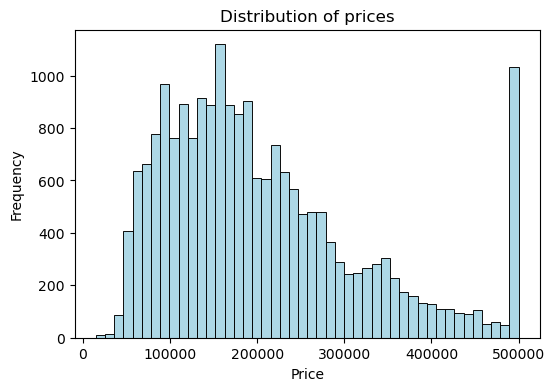

In [11]:
# Look at the median_house_value variable

plt.figure(figsize=(6, 4))
sns.histplot(df.median_house_value, color='lightblue', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

The data is squed to the left with the long tail

In [22]:
filtered_df = df[(df.ocean_proximity == '<1H OCEAN') | (df.ocean_proximity == 'INLAND')][['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]
filtered_df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


## Question 1
There's one feature with missing values. What is it?

* `total_rooms`
* `total_bedrooms` (*)
* `population`
* `households`


In [23]:
filtered_df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

## Question 2
What's the median (50% percentile) for variable 'population'?

* 995
* 1095
* 1195 (*)
* 1295


In [25]:
filtered_df.population.median()

1195.0

#### Prepare and split the dataset
* Shuffle the dataset (the filtered one you created above), use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the np.log1p() function.

In [28]:
# shuffle and split data set
np.random.seed(42)

n = len(filtered_df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = filtered_df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [29]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

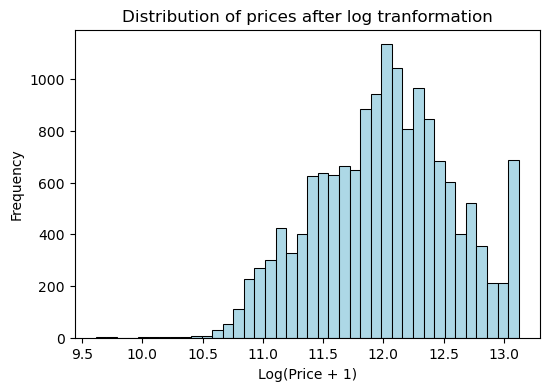

In [30]:
log_price = np.log1p(filtered_df.median_house_value)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='lightblue', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

The `median_house_value` for filtered dataset after `log` transformation

## Question 3
* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?


__Options:__

* With 0
* With mean
* Both are equally good (*)

In [34]:
# fill NA with 0
df_train_fzero = df_train.copy().fillna(0)
df_val_fzero = df_val.copy().fillna(0)
df_test_fzero = df_test.copy().fillna(0)

In [35]:
# fill NA with mean
mean_tr = df_train.mean()
df_train_fmean = df_train.copy().fillna(mean_tr)
df_val_fmean = df_val.copy().fillna(mean_tr)
df_test_fmean = df_test.copy().fillna(mean_tr)

In [36]:
#Linear Regression function
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [38]:
# weights for model where NAN replaced by 0
w_0_zero, w_zero = train_linear_regression(df_train_fzero, y_train)

In [39]:
# weights for model where NAN replaced by mean value
w_0_mean, w_mean = train_linear_regression(df_train_fmean, y_train)

In [41]:
# calculate prediction using validation data set
y_pred_zero = w_0_zero + df_val_fzero.dot(w_zero)
y_pred_mean = w_0_mean + df_val_fmean.dot(w_mean)


In [40]:
# RMSE
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [45]:
# calculate and compare RMSE
print(round(rmse(y_val, y_pred_zero), 2))
print(round(rmse(y_val, y_pred_mean), 2))

0.34
0.34


## Question 4
* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?
If there are multiple options, select the smallest r.

In [51]:
#declare regularisation term
r_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

__Options:__

* 0 (*)
* 0.000001
* 0.001
* 0.0001

In [48]:
def prepare_X(df, fill_val):
    #df_num = df[base]
    df_num = df.fillna(fill_val)
    X = df_num.values
    return X

In [49]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [53]:
for r in r_list:
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    print(r, w0, score)
    print(r, round(score, 2))
    print('---------')

0 -9.763249477680878 0.3408479034177055
0 0.34
---------
1e-06 -9.76322883054181 0.3408479061819175
1e-06 0.34
---------
0.0001 -9.761185235173034 0.3408481800593494
0.0001 0.34
---------
0.001 -9.742646249273005 0.3408506921852171
0.001 0.34
---------
0.01 -9.561056192855482 0.34087793004378303
0.01 0.34
---------
0.1 -8.058889769678107 0.34128620419778105
0.1 0.34
---------
1 -3.1331542784593767 0.34489583276371966
1 0.34
---------
5 -0.8410867975450146 0.34773980704806257
5 0.35
---------
10 -0.4381172315539199 0.3483149833519755
10 0.35
---------


## Question 5
* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))


__What's the value of std?__

* 0.5
* 0.05
* 0.005 (*)
* 0.0005
* __Note:__ Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [64]:
seed_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [65]:
df = pd.read_csv('housing.csv')
filtered_df = df[(df.ocean_proximity == '<1H OCEAN') | (df.ocean_proximity == 'INLAND')][['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]
filtered_df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [66]:
n = len(filtered_df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print(n, n_train, n_val, n_test, n_train+n_val+n_test)

15687 9413 3137 3137 15687


In [67]:
idx = np.arange(n)

In [69]:
scores = []
for s in seed_list:
    np.randomseed = s
    np.random.shuffle(idx)

    df_train = filtered_df.iloc[idx[: n_train]]
    df_val = filtered_df.iloc[idx[n_train : n_train + n_val]]
    df_test = filtered_df.iloc[idx[n_train + n_val : ]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = np.log1p(df_train['median_house_value'])
    y_val = np.log1p(df_val['median_house_value'])
    y_test = np.log1p(df_test['median_house_value'])

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    scores.append(score)
print(scores) 

[0.3359267044599775, 0.3343848917898799, 0.3311522789624514, 0.344348096971633, 0.33584425911660903, 0.3468310816535603, 0.3490506298798383, 0.33224611351141226, 0.33916380421090186, 0.3377200152801434]


In [70]:
std_scores = np.std(scores)
std_scores

0.005825828761619147

## Question 6
* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

__Options:__

* 0.13
* 0.23
* 0.33 (*)
* 0.43


In [79]:
df = pd.read_csv('housing.csv')
filtered_df = df[(df.ocean_proximity == '<1H OCEAN') | (df.ocean_proximity == 'INLAND')][['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]
filtered_df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [93]:
n = len(filtered_df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print(n, n_train, n_val, n_test)

np.randomseed = 9
np.random.shuffle(idx)


df_train = filtered_df.iloc[idx[: n_train]]
df_val = filtered_df.iloc[idx[n_train : n_train + n_val]]
df_test = filtered_df.iloc[idx[n_train + n_val : ]]
    
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
    
y_train = np.log1p(df_train['median_house_value'])
y_val = np.log1p(df_val['median_house_value'])
y_test = np.log1p(df_test['median_house_value'])

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']


15687 9413 3137 3137


In [96]:
# combine train and validation data sets

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
df_full_train

y_full_train = np.concatenate([y_train, y_val])

In [97]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [98]:
X_full_train = prepare_X(df_full_train, 0)
X_full_train

array([[ 3.8560e+01, -1.2148e+02,  5.0000e+01, ...,  8.7700e+02,
         3.8000e+02,  2.0833e+00],
       [ 3.6730e+01, -1.1978e+02,  5.2000e+01, ...,  1.2800e+03,
         2.5900e+02,  1.2344e+00],
       [ 3.7980e+01, -1.2123e+02,  2.7000e+01, ...,  3.7300e+02,
         1.3100e+02,  5.0362e+00],
       ...,
       [ 3.9040e+01, -1.2269e+02,  9.0000e+00, ...,  6.6000e+01,
         2.9000e+01,  2.7639e+00],
       [ 3.4110e+01, -1.1830e+02,  2.5000e+01, ...,  5.6800e+02,
         2.0600e+02,  8.4389e+00],
       [ 3.7540e+01, -1.2197e+02,  2.8000e+01, ...,  1.3440e+03,
         4.6700e+02,  4.7135e+00]])

In [99]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [100]:
print(w0, w)

-9.786773194623644 [-2.69472466e-01 -2.56573225e-01  1.68043514e-03 -2.99195732e-05
  2.77437577e-04 -1.61979211e-04  4.09955072e-04  1.79856580e-01]


In [101]:
df_test.fillna(0)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,34.01,-118.34,37.0,4291.0,1102.0,1941.0,953.0,1.7945
1,34.09,-118.38,28.0,4001.0,1352.0,1799.0,1220.0,2.5784
2,33.87,-118.11,33.0,1379.0,254.0,795.0,297.0,4.6713
3,34.29,-118.75,17.0,5512.0,0.0,2734.0,814.0,6.6073
4,34.17,-118.13,49.0,1962.0,435.0,1329.0,457.0,3.2898
...,...,...,...,...,...,...,...,...
3132,33.95,-118.20,35.0,1924.0,520.0,2101.0,541.0,2.4267
3133,34.07,-117.70,33.0,1552.0,288.0,1326.0,303.0,3.7969
3134,38.87,-121.19,20.0,3118.0,500.0,1405.0,519.0,6.0000
3135,34.24,-118.47,19.0,2405.0,661.0,1855.0,621.0,2.3111


In [102]:
X_test = prepare_X(df_test, 0)
y_pred = w0 + X_test.dot(w)

rmse(y_test , y_pred)

0.33200704363644884